# Handwritten Digit Classification Project
- By Valentine Ezenwanne

## Import the libraries

In [1]:
#import the libraries
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load the dataset mnist
mnist = tf.keras.datasets.mnist

In [3]:
#split the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
#check the shape of the training set
X_train.shape

(60000, 28, 28)

In [6]:
#check the shape of the test set
X_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_test.shape

(10000,)

### Displaying the image of training set

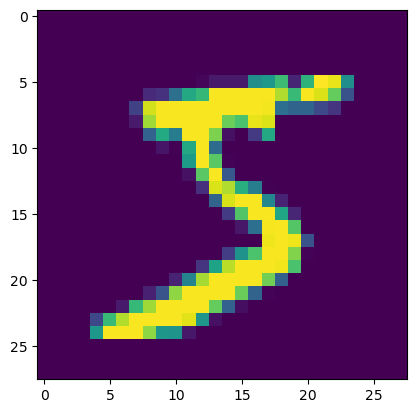

In [10]:
plt.imshow(X_train[0])

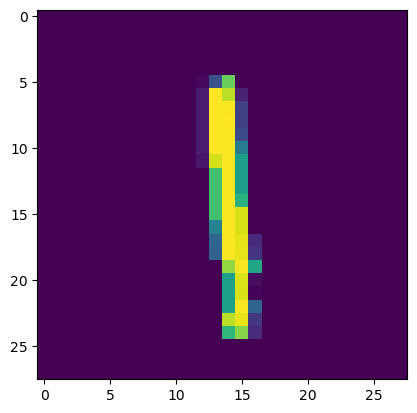

In [11]:
plt.imshow(X_train[8])

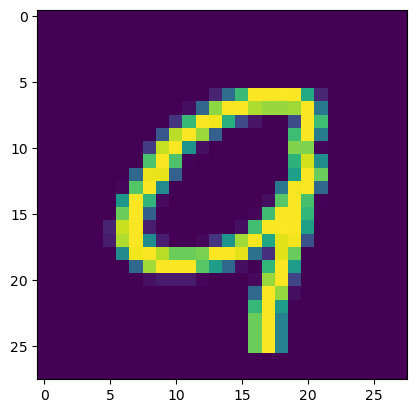

In [12]:
plt.imshow(X_train[3000])

## Normalize the dataset

In [13]:
#normalize the X_train and X_test
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

## Create the model

In [14]:
#create the model
model = tf.keras.models.Sequential()

## Add Layers to the model

In [15]:
#Add layers to the model
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

## Compile the model

In [16]:
#compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Fit the Model

In [17]:
#fit the model
model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
6000/6000 [==============================] - 52s 5ms/step - loss: 0.2228 - accuracy: 0.9317
Epoch 2/100
6000/6000 [==============================] - 33s 5ms/step - loss: 0.1024 - accuracy: 0.9680
Epoch 3/100
6000/6000 [==============================] - 31s 5ms/step - loss: 0.0763 - accuracy: 0.9763
Epoch 4/100
6000/6000 [==============================] - 34s 6ms/step - loss: 0.0597 - accuracy: 0.9819
Epoch 5/100
6000/6000 [==============================] - 42s 7ms/step - loss: 0.0491 - accuracy: 0.9844
Epoch 6/100
6000/6000 [==============================] - 32s 5ms/step - loss: 0.0405 - accuracy: 0.9870
Epoch 7/100
6000/6000 [==============================] - 33s 5ms/step - loss: 0.0355 - accuracy: 0.9888
Epoch 8/100
6000/6000 [==============================] - 31s 5ms/step - loss: 0.0333 - accuracy: 0.9900
Epoch 9/100
6000/6000 [==============================] - 33s 6ms/step - loss: 0.0298 - accuracy: 0.9912
Epoch 10/100
6000/6000 [==============================] - 31s 5m

6000/6000 [==============================] - 26s 4ms/step - loss: 0.0162 - accuracy: 0.9980
Epoch 80/100
6000/6000 [==============================] - 26s 4ms/step - loss: 0.0120 - accuracy: 0.9984
Epoch 81/100
6000/6000 [==============================] - 28s 5ms/step - loss: 0.0121 - accuracy: 0.9985
Epoch 82/100
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0135 - accuracy: 0.9983
Epoch 83/100
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0106 - accuracy: 0.9985
Epoch 84/100
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0114 - accuracy: 0.9986
Epoch 85/100
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0142 - accuracy: 0.9984
Epoch 86/100
6000/6000 [==============================] - 31s 5ms/step - loss: 0.0094 - accuracy: 0.9989
Epoch 87/100
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0169 - accuracy: 0.9984
Epoch 88/100
6000/6000 [==============================] - 31s 5ms/st

## Evaluate the Model

In [18]:
#evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 4ms/step - loss: 0.6774 - accuracy: 0.9786


In [19]:
print('The loss is: ', loss)
print('The accuracy is: ', accuracy)

The loss is:  0.6773858666419983
The accuracy is:  0.978600025177002


## Save the model

In [20]:
#save the model
model.save('handwritten.model')

INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


## Load the model

In [21]:
model = tf.keras.models.load_model('handwritten.model')

### Load and Predict hand written images

1/1 [==============================] - 6s 6s/step
This image is probably a 3


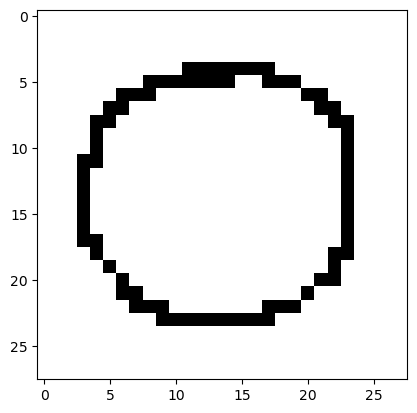

1/1 [==============================] - 0s 408ms/step
This image is probably a 1


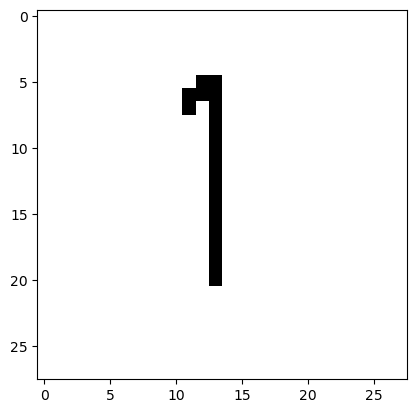

1/1 [==============================] - 0s 130ms/step
This image is probably a 2


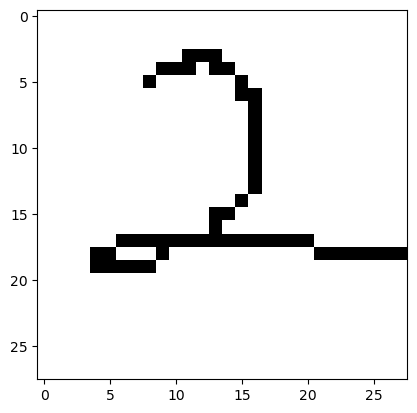

1/1 [==============================] - 0s 497ms/step
This image is probably a 3


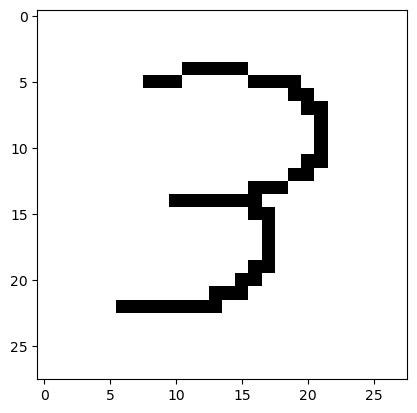

1/1 [==============================] - 0s 68ms/step
This image is probably a 9


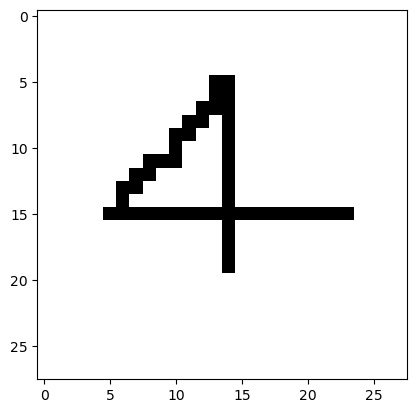

1/1 [==============================] - 0s 121ms/step
This image is probably a 5


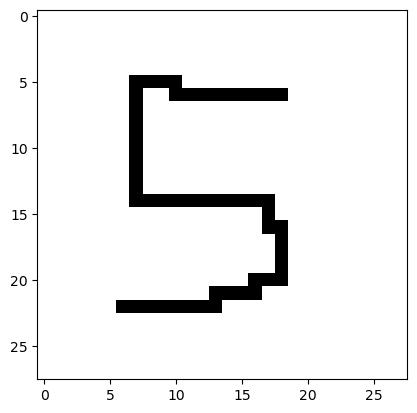

1/1 [==============================] - 0s 139ms/step
This image is probably a 3


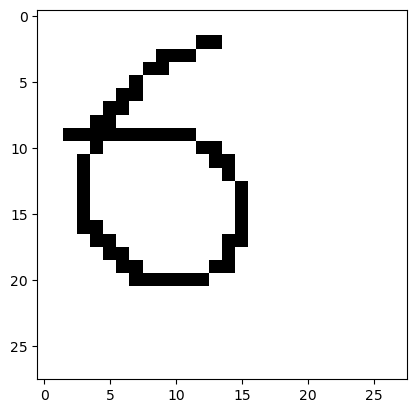

1/1 [==============================] - 0s 134ms/step
This image is probably a 7


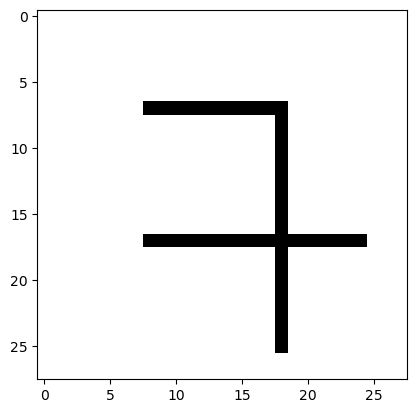

1/1 [==============================] - 0s 59ms/step
This image is probably a 8


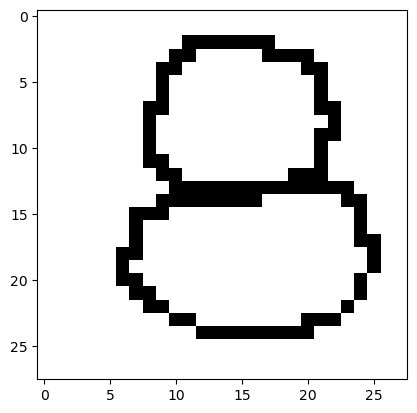

1/1 [==============================] - 0s 55ms/step
This image is probably a 9


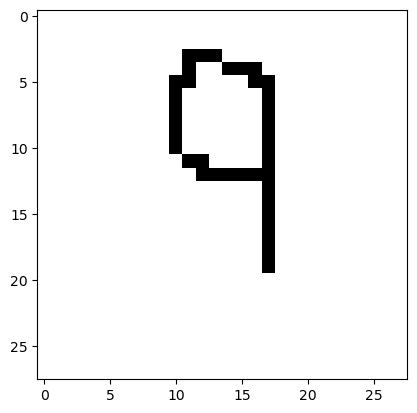

In [24]:
#load, preprocess and predict the handwritten digits
img_num = 0
while os.path.isfile(f"images/image{img_num}.png"):
    try:
        img = cv2.imread(f"images/image{img_num}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This image is probably a {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error!")
    finally:
        img_num +=1